In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Loading data 
data = pd.read_csv("housing.csv")


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  int64  
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.7+ MB


In [7]:
# Removing na values from the data
data.dropna(inplace= True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  int64  
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.7+ MB


In [11]:
# importing train_test_split function from sklearn to split data  into two parts
# X= Training data
# Y= Testing data
from sklearn.model_selection import train_test_split

X= data.drop(['median_house_value'], axis=1)
Y= data['median_house_value']



In [13]:
# Checking correct data got splitted into X
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND


In [15]:
# Checking correct data got splitted into Y
Y

0        452600
1        358500
2        352100
3        341300
4        342200
          ...  
20635     78100
20636     77100
20637     92300
20638     84700
20639     89400
Name: median_house_value, Length: 20433, dtype: int64

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state= 42)

In [17]:
data_train= X_train.join(Y_train)

In [39]:
data_train['total_rooms']= np.log(data_train['total_rooms'] + 1)
data_train['total_bedrooms'] = np.log(data_train['total_bedrooms'] + 1)
data_train['population'] = np.log(data_train['population'] + 1)
data_train['households'] = np.log(data_train['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'bedroom_ratio'}>,
        <Axes: title={'center': 'household_rooms'}>, <Axes: >]],
      dtype=object)

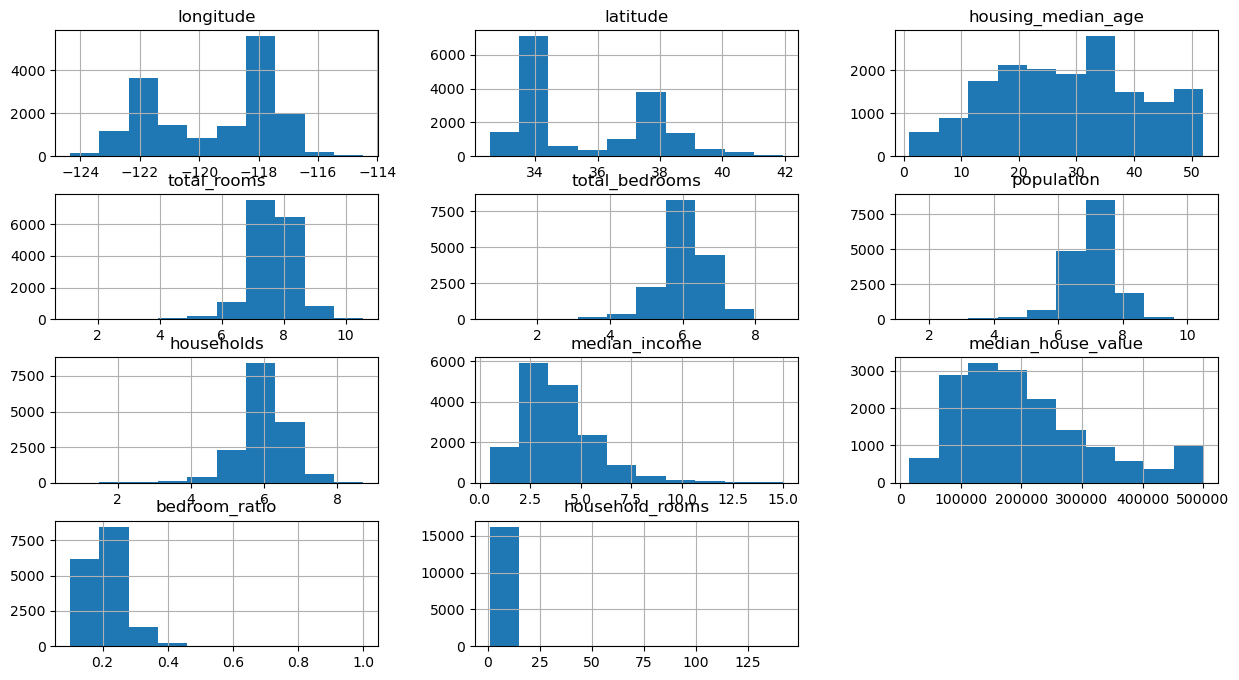

In [41]:
data_train.hist(figsize=(15,8))

In [45]:
data_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
17727,-121.80,37.32,14,8.392310,6.829794,7.900637,6.793466,4.7027,227600,True,False,False,False,False,0.209429,4.951740
2057,-119.63,36.64,33,6.944087,5.204007,6.431331,5.164786,3.4107,110400,False,True,False,False,False,0.174710,5.954023
6453,-118.06,34.12,25,8.266678,6.744059,7.522400,6.633318,3.6639,248100,False,True,False,False,False,0.217939,5.126482
4619,-118.31,34.07,28,7.767687,6.856462,7.922986,6.796824,2.2364,305600,True,False,False,False,False,0.401778,2.642058
15266,-117.27,33.04,27,7.517521,5.973810,7.172425,6.003887,3.5500,214600,False,False,False,False,True,0.213159,4.551980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24,8.003697,6.216606,7.271009,6.118097,5.4286,273400,True,False,False,False,False,0.167168,6.602649
12081,-117.54,33.76,5,8.673684,6.943122,8.089176,6.909753,4.7965,160800,True,False,False,False,False,0.177044,5.840160
5447,-118.42,34.01,42,7.374629,5.913503,6.859615,5.894403,3.0990,335400,True,False,False,False,False,0.231493,4.403315
866,-122.04,37.57,12,8.651724,6.970730,8.142354,6.964136,5.2879,231200,False,False,False,True,False,0.186047,5.410596


In [101]:
# Ocean proximity is an important factor to determine house price, hence we have added seperate columns for ocean, inland, island, near bay, and near ocean locations to determine distance  
data_train= data_train.join(pd.get_dummies(data_train.ocean_proximity)).drop(['ocean_proximity'], axis=1)

AttributeError: 'DataFrame' object has no attribute 'ocean_proximity'

In [47]:
data_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
17727,-121.80,37.32,14,8.392310,6.829794,7.900637,6.793466,4.7027,227600,True,False,False,False,False,0.209429,4.951740
2057,-119.63,36.64,33,6.944087,5.204007,6.431331,5.164786,3.4107,110400,False,True,False,False,False,0.174710,5.954023
6453,-118.06,34.12,25,8.266678,6.744059,7.522400,6.633318,3.6639,248100,False,True,False,False,False,0.217939,5.126482
4619,-118.31,34.07,28,7.767687,6.856462,7.922986,6.796824,2.2364,305600,True,False,False,False,False,0.401778,2.642058
15266,-117.27,33.04,27,7.517521,5.973810,7.172425,6.003887,3.5500,214600,False,False,False,False,True,0.213159,4.551980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24,8.003697,6.216606,7.271009,6.118097,5.4286,273400,True,False,False,False,False,0.167168,6.602649
12081,-117.54,33.76,5,8.673684,6.943122,8.089176,6.909753,4.7965,160800,True,False,False,False,False,0.177044,5.840160
5447,-118.42,34.01,42,7.374629,5.913503,6.859615,5.894403,3.0990,335400,True,False,False,False,False,0.231493,4.403315
866,-122.04,37.57,12,8.651724,6.970730,8.142354,6.964136,5.2879,231200,False,False,False,True,False,0.186047,5.410596


<Axes: xlabel='latitude', ylabel='longitude'>

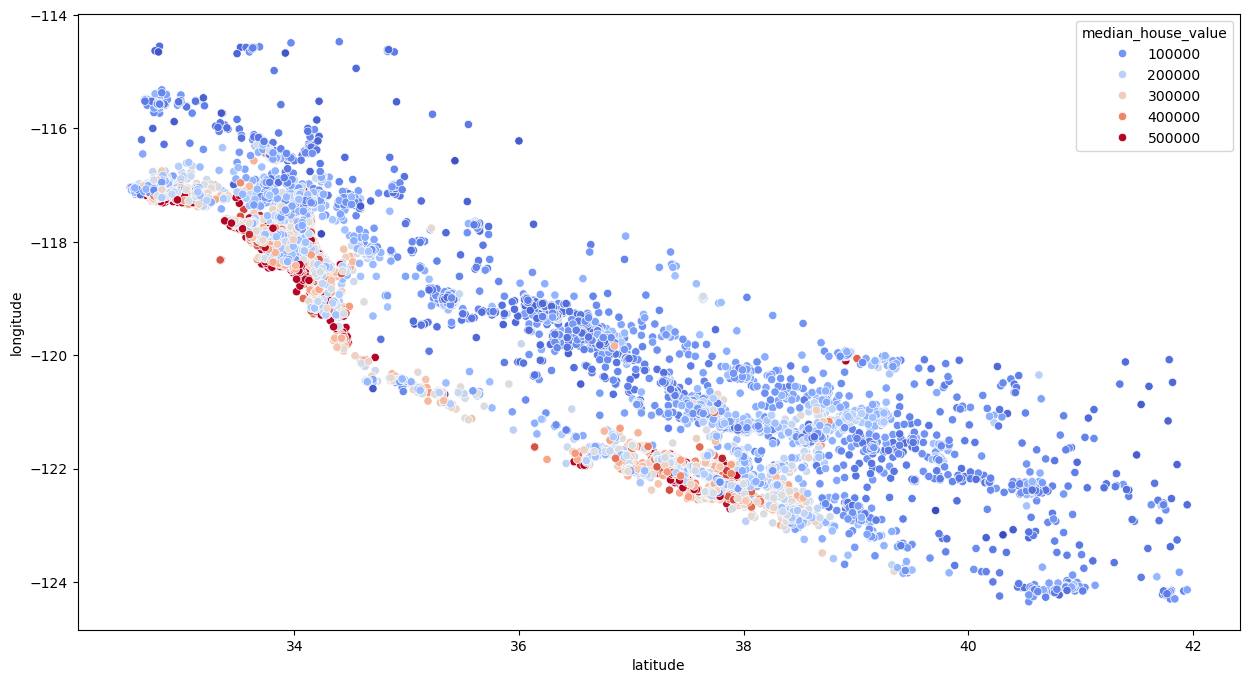

In [35]:
plt.figure(figsize= (15,8))
sns.scatterplot(x='latitude', y='longitude', data= data_train, hue= 'median_house_value', palette= 'coolwarm')

In [23]:
# Checking how many rooms per households
data_train['bedroom_ratio']=  data_train['total_bedrooms']/ data_train['total_rooms']

data_train['household_rooms']= data_train['total_rooms']/data_train['households']

<Axes: >

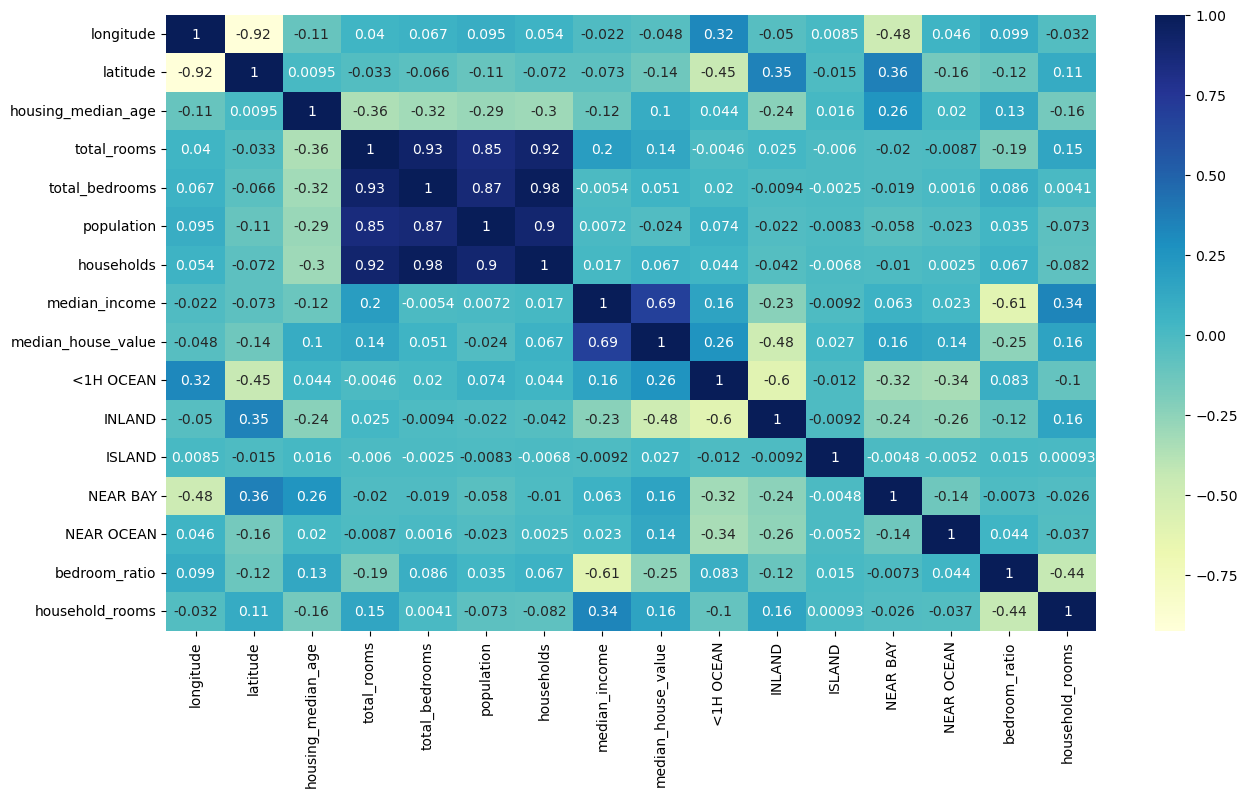

In [39]:
plt.figure(figsize= (15,8))
sns.heatmap(data_train.corr(), annot= True, cmap= 'YlGnBu')

In [115]:
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()


X_train, Y_train = data_train. drop (['median_house_value'], axis= 1), data_train['median_house_value']

X_train_s= scaler.fit_transform(X_train)


reg= LinearRegression()

reg.fit(X_train_s, Y_train)

LinearRegression()

In [139]:
test_data = X_test.join(Y_test)

test_data['total_rooms']= np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies (test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio']=  test_data['total_bedrooms']/ test_data['total_rooms']

test_data['household_rooms']= test_data['total_rooms']/test_data['households']

AttributeError: 'DataFrame' object has no attribute 'ocean_proximity'

In [105]:
X_test, Y_test = test_data.drop(['median_house_value'], axis= 1), test_data['median_house_value']

In [107]:
reg.fit(X_test, Y_test)

LinearRegression()

In [135]:
X_test_s = scaler.transform(X_test)

In [143]:
reg.score(X_test_s, Y_test)

-1.5313391812692814e+21

In [131]:
reg.score(X_train_s, Y_train)

0.6720630556881717

In [161]:
from sklearn.ensemble import RandomForestRegressor


forest= RandomForestRegressor()

forest.fit(X_train_s, Y_train)

RandomForestRegressor()

In [163]:
forest.score(X_train_s, Y_train)

0.9748384912182502

In [204]:
from sklearn.model_selection import GridSearchCV

forest= RandomForestRegressor()

param_grid = {

    'n_estimators': [100, 200,300 ],
    'min_samples_split': [2,4],
    'max_depth': [None, 4, 8]
    
    
}

grid_search= GridSearchCV(forest, param_grid, cv=5, scoring= 'neg_mean_squared_error', return_train_score = True)


grid_search.fit(X_train_s, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [213]:
best_forest = grid_search.best_estimator_

In [221]:
grid_search.best_estimator_.score(X_test_s, Y_test)

0.7456749703728918